In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.vision import *
from fastai.metrics import error_rate

In [6]:
bs = 64

In [7]:
path = Path('../../challenges/2')
path

PosixPath('../../challenges/2')

In [8]:
path_img = path/'images'

In [9]:
path.ls()

[PosixPath('../../challenges/2/images'),
 PosixPath('../../challenges/2/annotations')]

In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('../../challenges/2/images/Normal_341.png'),
 PosixPath('../../challenges/2/images/Danificado_291.png'),
 PosixPath('../../challenges/2/images/Normal_144.png'),
 PosixPath('../../challenges/2/images/Normal_151.png'),
 PosixPath('../../challenges/2/images/Normal_347.png')]

In [11]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.png$'

In [12]:
data = ImageDataBunch.from_name_re(
            path_img,
            fnames,
            pat,
            ds_tfms=get_transforms(),
            size=365,
            bs=bs//2
        ).normalize(imagenet_stats)

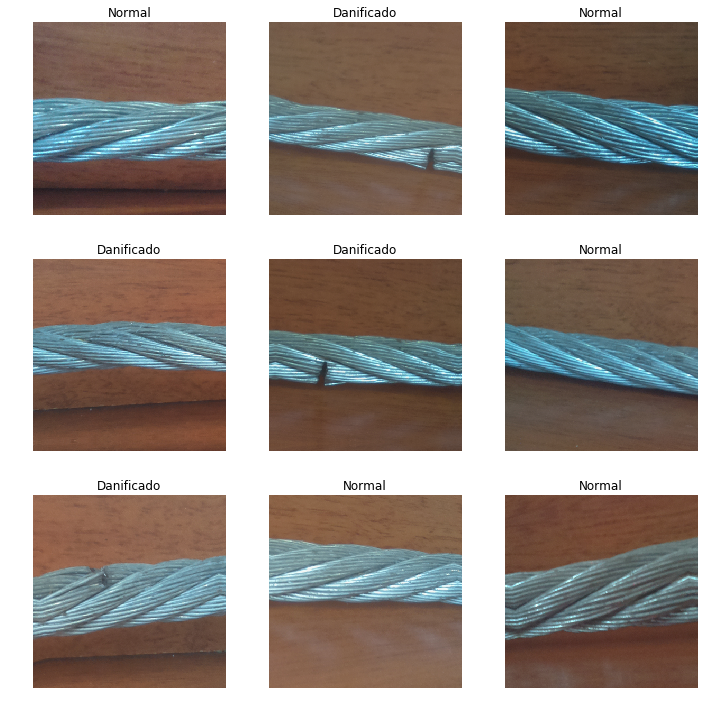

In [13]:
data.show_batch(rows=3, figsize=(10,10))

In [14]:
print(data.classes)
len(data.classes)
data.c

['Danificado', 'Normal']


2

In [15]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/thiago/.torch/models/resnet50-19c8e357.pth
102502400it [00:05, 18651730.33it/s]


In [16]:
import torch
torch.cuda.empty_cache()

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.715450,2.307937,0.287671,05:50
1,0.655993,0.372697,0.863014,05:03
2,0.597937,0.463179,0.821918,04:43
3,0.547671,0.468502,0.808219,04:44


In [18]:
learn.save('v2')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

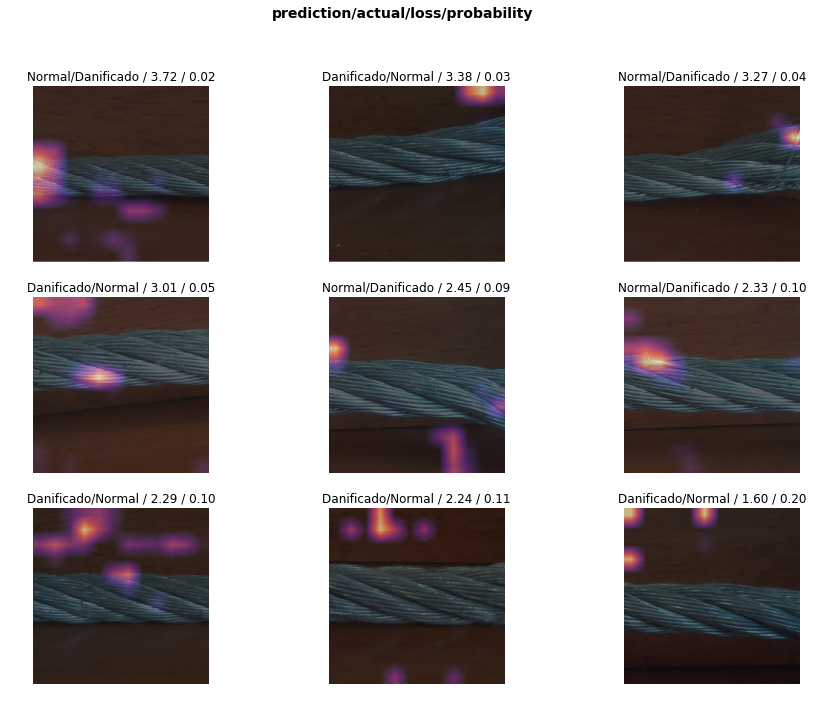

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

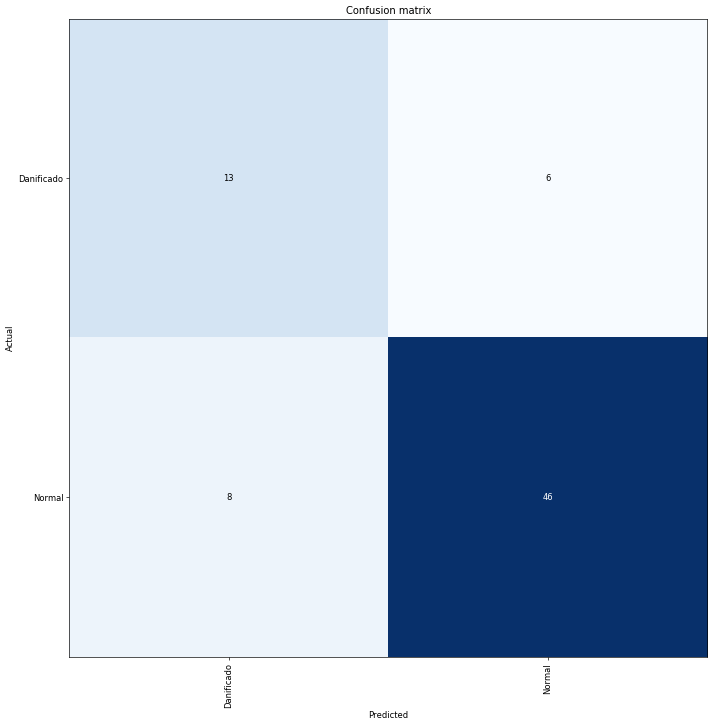

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
interp.most_confused(min_val=2)

[('Normal', 'Danificado', 8), ('Danificado', 'Normal', 6)]